In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("Cardiotocographic.csv")
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [50]:
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [52]:
## Missing values
df.isnull().any()

LB           True
AC           True
FM          False
UC          False
DL          False
DS           True
DP           True
ASTV        False
MSTV        False
ALTV        False
MLTV         True
Width        True
Tendency     True
NSP          True
dtype: bool

In [54]:
mean=df.mean()
mean

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [147]:
## replacing the missing values with mean value
df.fillna(mean,inplace=True)

In [58]:
df.isnull().any()

LB          False
AC          False
FM          False
UC          False
DL          False
DS          False
DP          False
ASTV        False
MSTV        False
ALTV        False
MLTV        False
Width       False
Tendency    False
NSP         False
dtype: bool

In [60]:
## Duplicates Values
df[df.duplicated()]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0

In [62]:
df.drop_duplicates(inplace=True)
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2124 rows x 14 columns]

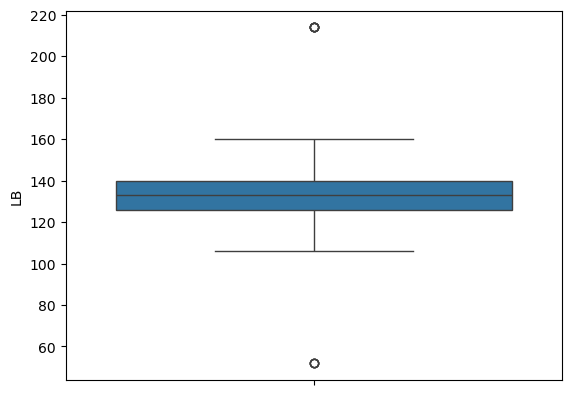

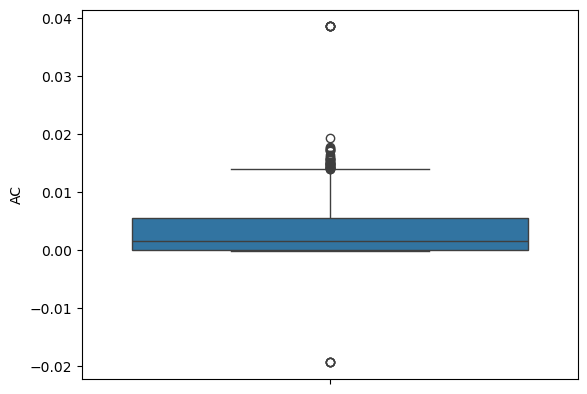

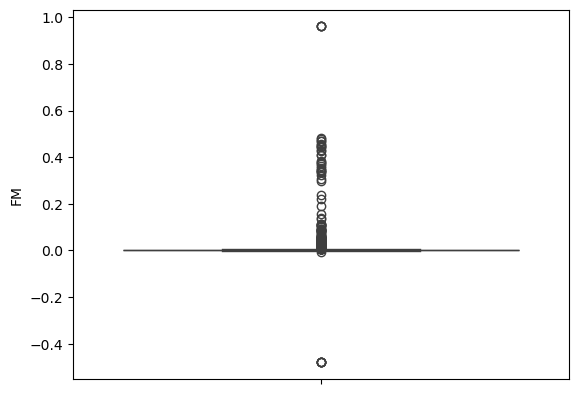

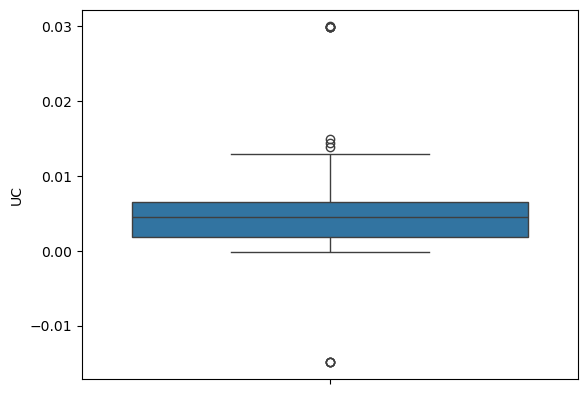

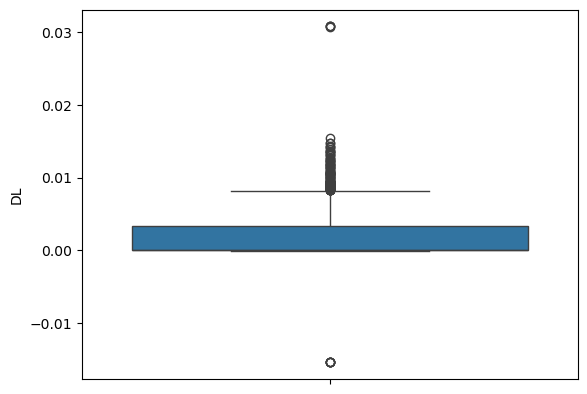

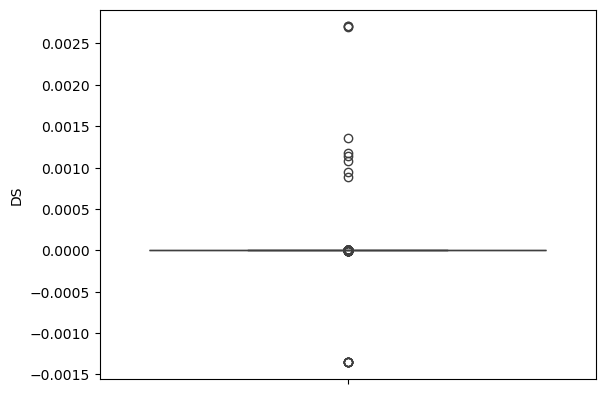

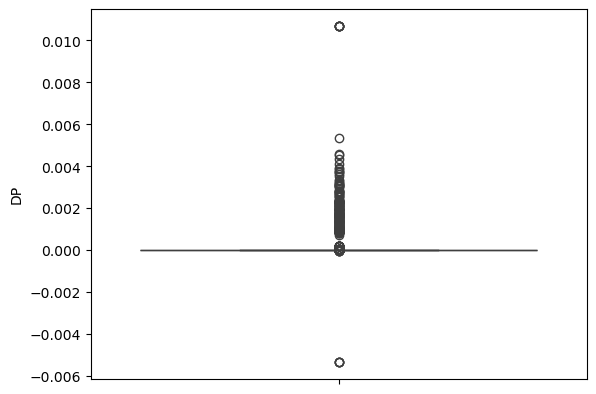

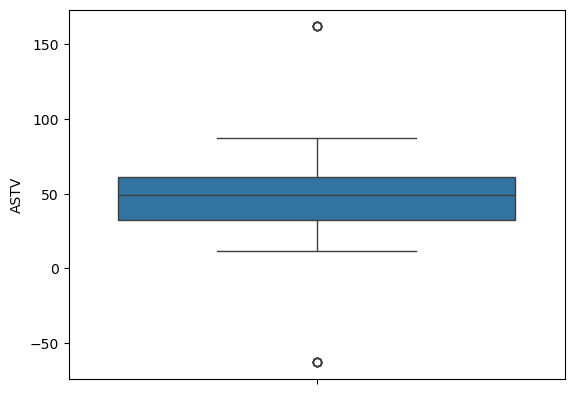

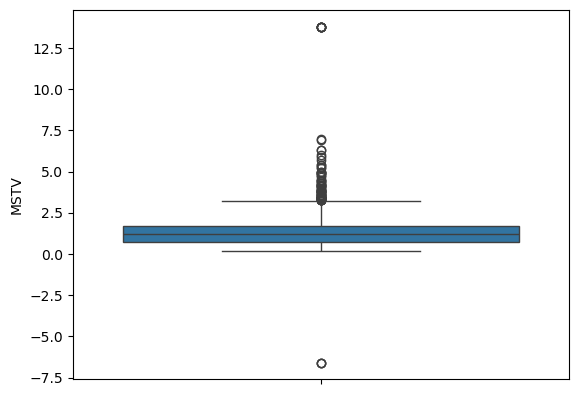

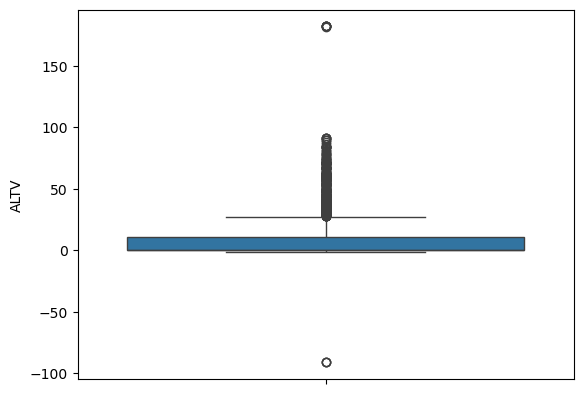

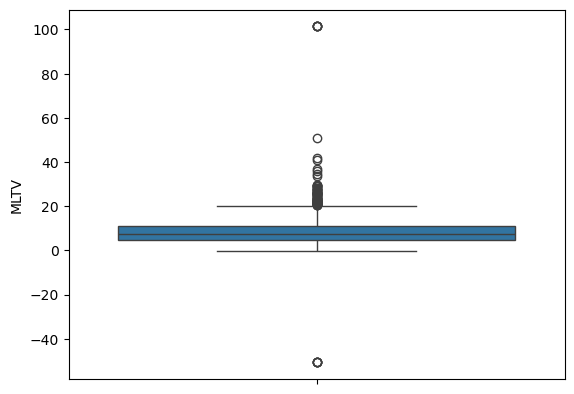

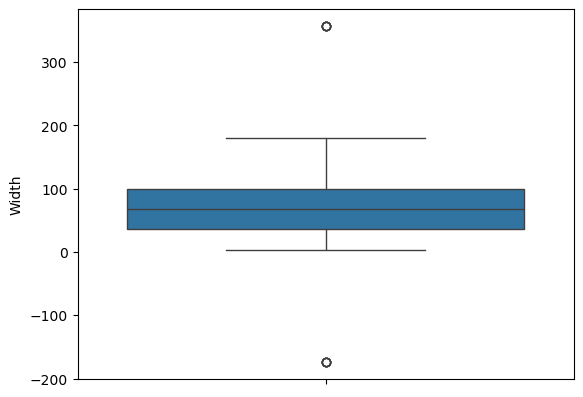

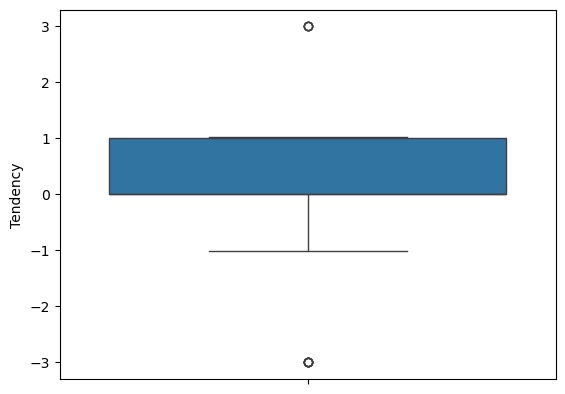

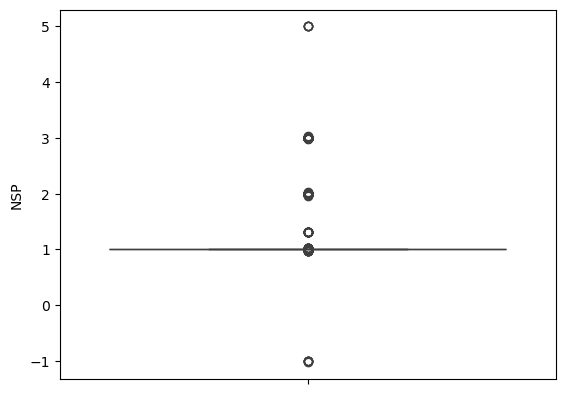

In [64]:
## Treating Outliers
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.ylabel(i)     
    plt.show()

In [66]:
def outlier_remove(df, columns):
    threshold = 3
    z_score = stats.zscore(df[columns])
    return df[(abs(z_score) < threshold).all(axis=1)]

In [68]:
df_new = outlier_remove(df, df.columns)
df_new.reset_index()

index          LB        AC        FM        UC        DL   DS   DP  \
0         0  120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
1         1  132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0   
2         2  133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0   
3         3  134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0   
4         4  131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0   
...     ...         ...       ...       ...       ...       ...  ...  ...   
1862   2120  140.000000  0.000000  0.000000  0.004975  0.001244  0.0  0.0   
1863   2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0   
1864   2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0   
1865   2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0   
1866   2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0   

      ASTV  MSTV       ALTV  MLTV  Width  Tendency       NSP  
0     73.0   0.5  43.000000   2.4   64.0  0.999926  2.000000  
1     17.0   2.1   0.000000  10.4  130.0  0.000000  1.000000  
2     16.0   2.1   0.000000  13.4  130.0  0.000000  1.000000  
3     16.0   2.4   0.000000  23.0  117.0  1.000000  1.000000  
4     16.0   2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...   ...        ...   ...    ...       ...       ...  
1862  77.0   0.7  17.000000   6.0   31.0  0.000000  1.000000  
1863  78.0   0.4  22.000000   7.1   66.0  1.000000  2.000000  
1864  79.0   0.4  20.000000   6.1   67.0  1.000000  1.990464  
1865  78.0   0.4  27.000000   7.0   66.0  1.000000  2.000000  
1866  74.0   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[1867 rows x 15 columns]

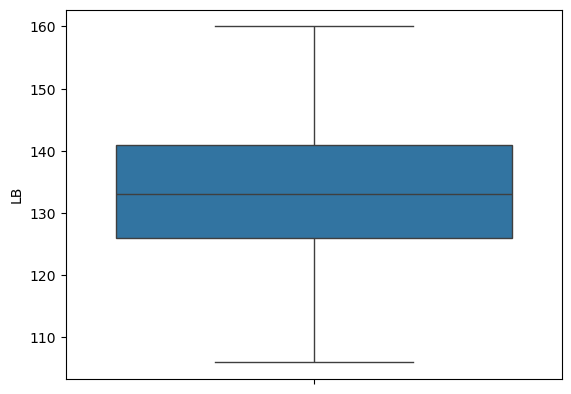

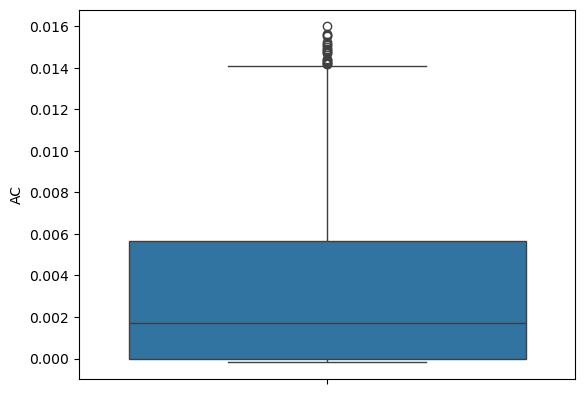

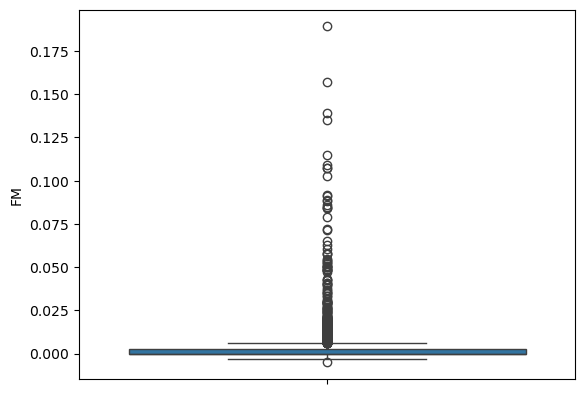

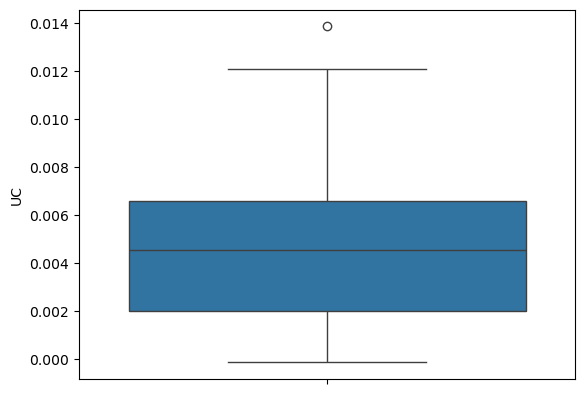

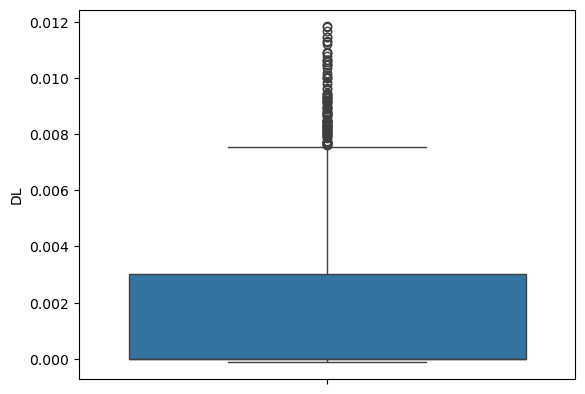

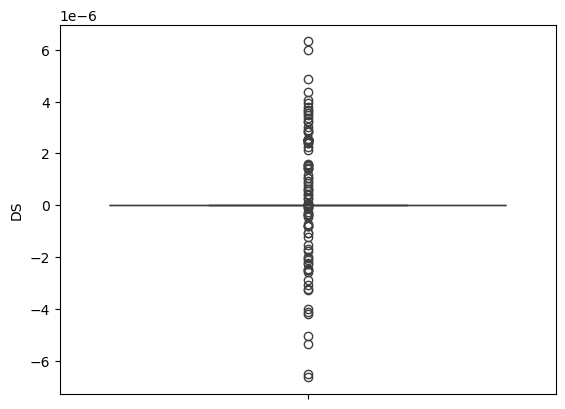

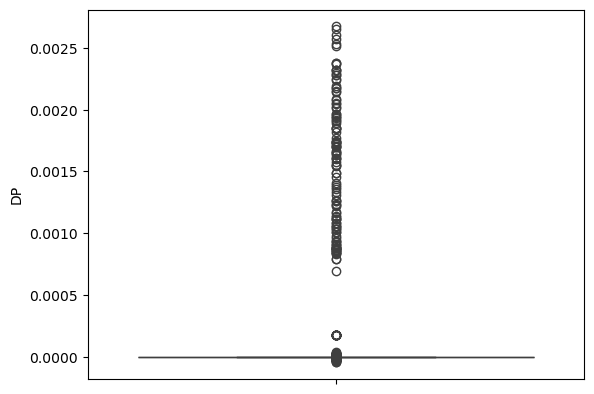

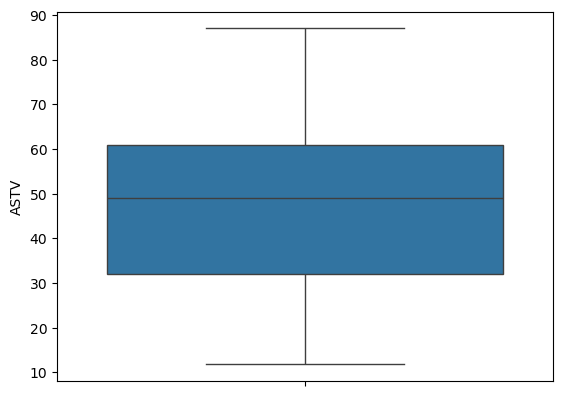

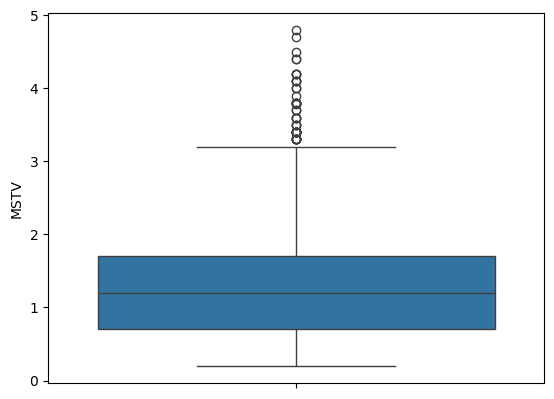

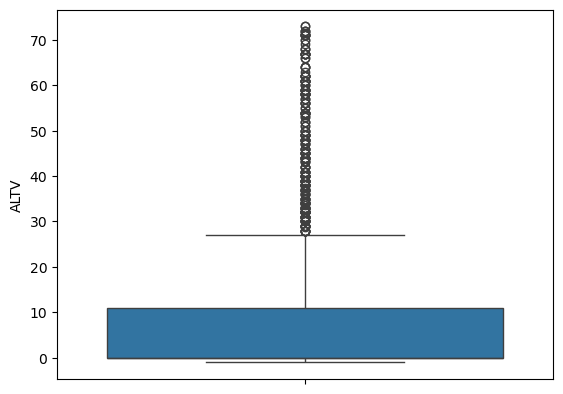

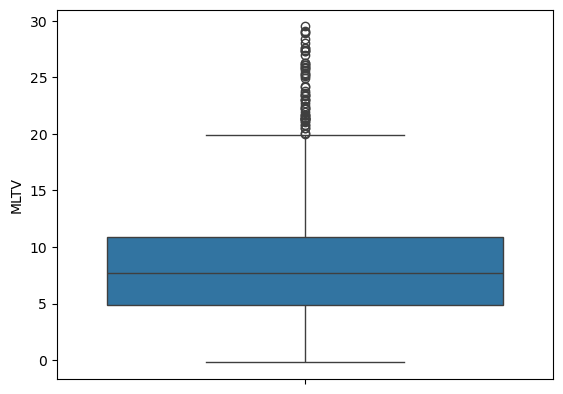

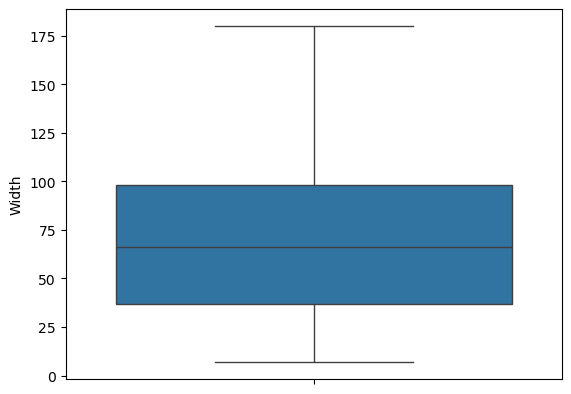

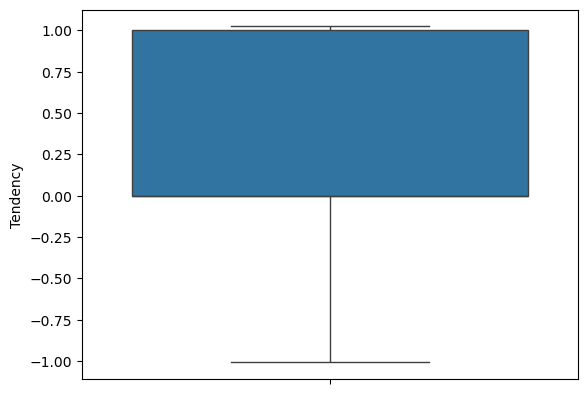

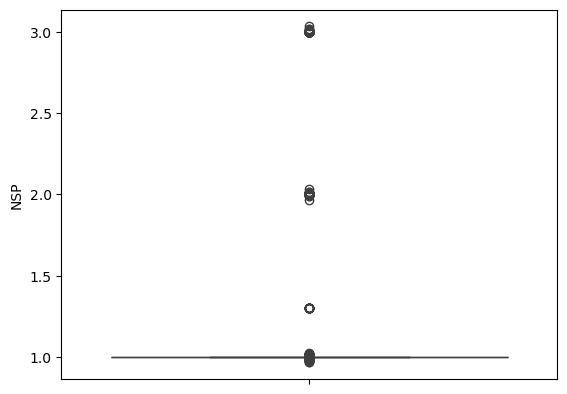

In [70]:
## After removing Outliers
for i in df_new.columns:
    sns.boxplot(y=df_new[i])
    plt.ylabel(i)     
    plt.show()

In [82]:
summary=df_new.describe()
summary

LB           AC           FM           UC           DL  \
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000   
mean    133.305142     0.003195     0.004244     0.004394     0.001734   
std       9.895631     0.003768     0.013560     0.002904     0.002706   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002002     0.000000   
50%     133.000000     0.001733     0.000000     0.004556     0.000000   
75%     141.000000     0.005650     0.002364     0.006584     0.003038   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.867000e+03  1867.000000  1867.000000  1867.000000  1867.000000   
mean   3.740784e-08     0.000102    46.889476     1.283048     9.203743   
std    6.371032e-07     0.000405    16.830420     0.778335    16.580909   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    49.000000     1.200000     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000    11.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    73.000000   

              MLTV        Width     Tendency          NSP  
count  1867.000000  1867.000000  1867.000000  1867.000000  
mean      8.324508    68.964818     0.332620     1.245220  
std       5.226582    37.619585     0.601054     0.528847  
min      -0.200788     7.000000    -1.006614     0.967075  
25%       4.900000    37.000000     0.000000     1.000000  
50%       7.700000    66.000000     0.000000     1.000000  
75%      10.900000    98.000000     1.000000     1.000000  
max      29.500000   180.000000     1.023635     3.034545

In [132]:
IQR=[]
for i in df.columns:
    Q1 = df_new[i].quantile(0.25)
    Q3 = df_new[i].quantile(0.75)
    IQR.append(Q3-Q1)
    
IQR=pd.DataFrame(IQR,index=df.columns)
IQR

0
LB        15.000000
AC         0.005650
FM         0.002364
UC         0.004582
DL         0.003038
DS         0.000000
DP         0.000000
ASTV      29.000000
MSTV       1.000000
ALTV      11.000000
MLTV       6.000000
Width     61.000000
Tendency   1.000000
NSP        0.000000

Statistical Summary of Dataset after removing the outliers
It includes
#### Mean
The mean is the sum of all values divided by the total number of values.
Formula:
Mean=Sum_of_Observations/Number of Observations

#### Median

The median is the middle value in a sorted list.

Formula:

For even number of observations: 

Median=𝑛/2
 
For odd number of observations:

Median=𝑛+1/2

#### Mode

The mode is the value that appears most frequently.

Formula for grouped data:

Mode=l+((f1-f0)/2f1-f0-f2)*h

l = Lower limit of the modal class

h = Class interval size

𝑓1= Frequency of the modal class

𝑓0=Frequency of the preceding class

𝑓2=Frequency of the succeeding 

#### Standard Deviation
Measures how spread out the data is from the mean.

Formula=Sqrt((sqr(observation-mean_data))/no_of_observation)

#### Q1(25%)

Q1=N+1/4 th term

#### Q2(50%)

Q1=N+1/2 th term

#### Q3(75%)

Q1=3(N+1)/4 th term

#### IQR

IQR=Q3-Q1

In [72]:
## Correlation
corr=df_new.corr()

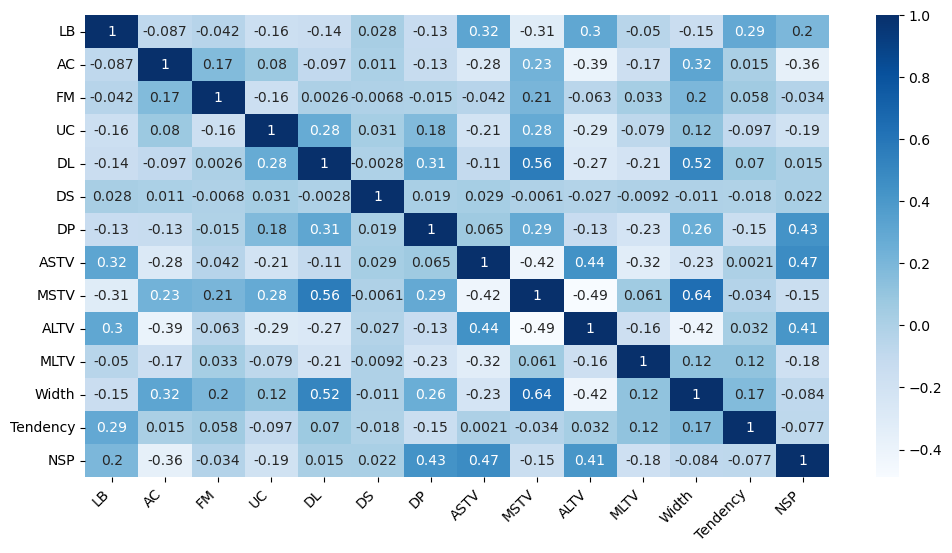

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')
plt.show()

##### If the threshold value is assigned as .5 , 
We can remove either (Width or MSTV),(MSTV or DL) ,(DLor Width) since there correlation is greter than.5

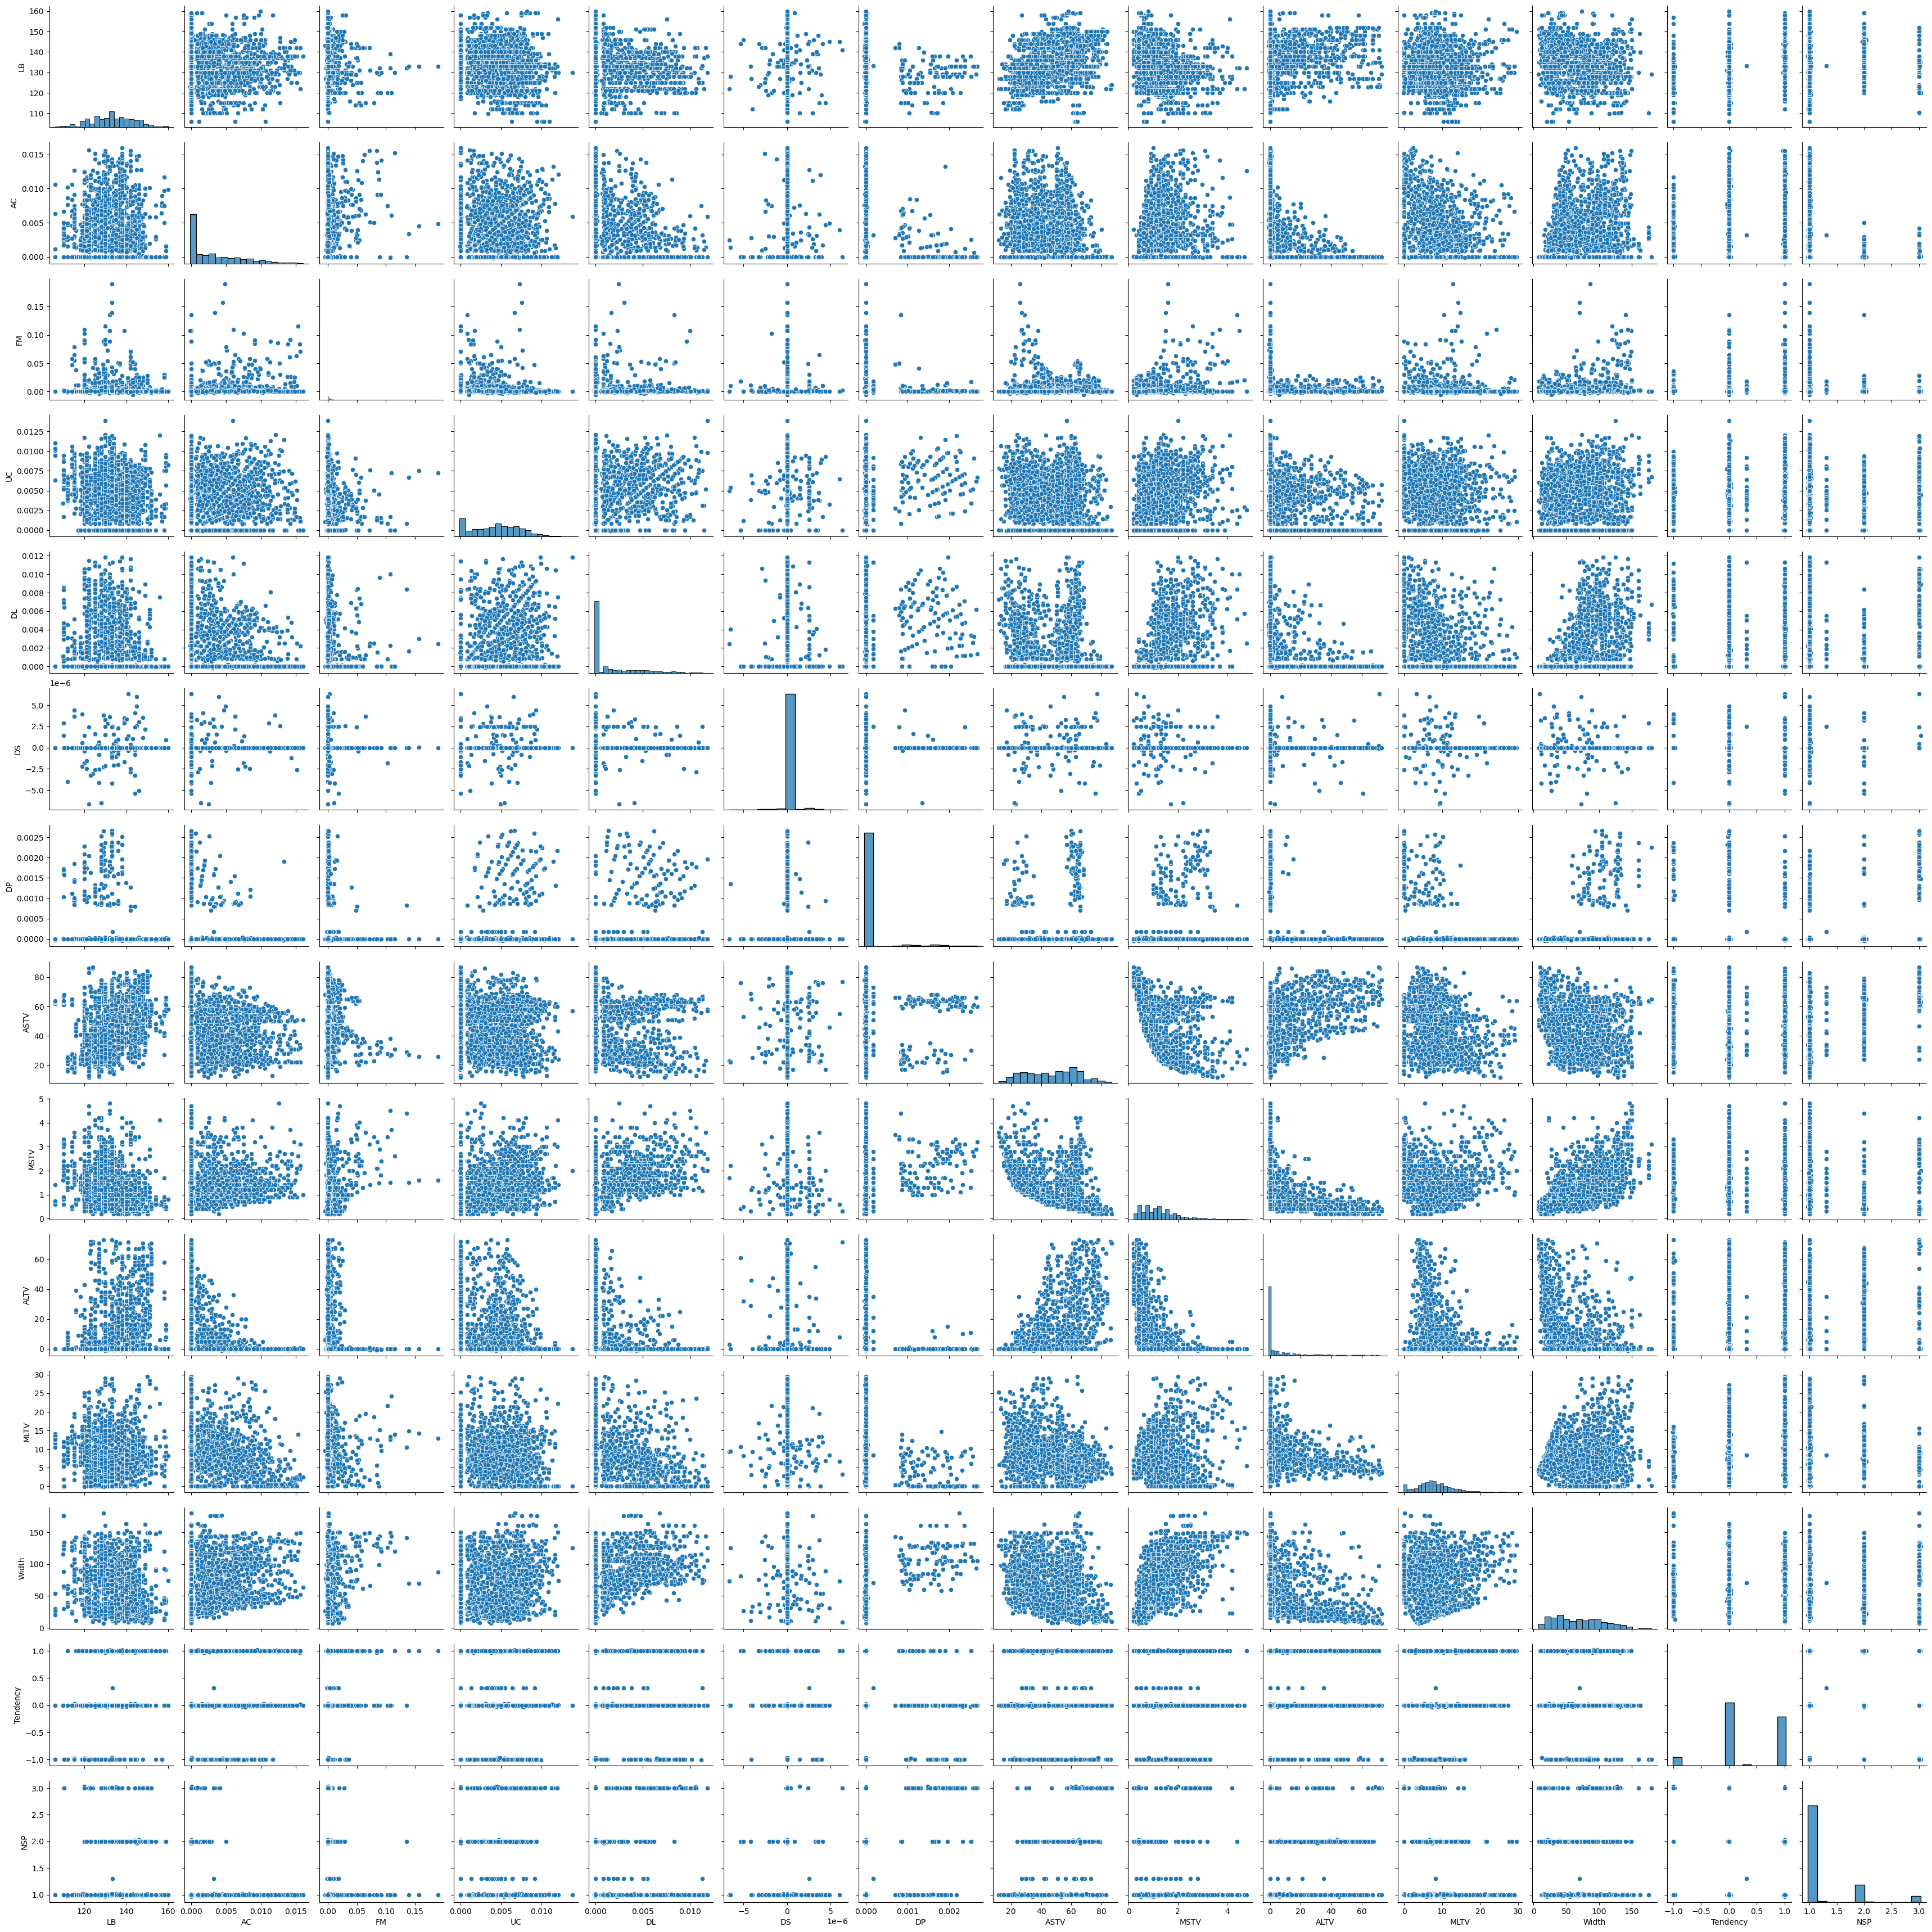

In [42]:
sns.pairplot(df_new)
plt.show()

In [149]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler=StandardScaler()

In [155]:
scaled_data=pd.DataFrame(scaler.fit_transform(df_new),columns=df_new.columns)
scaled_data

LB        AC        FM        UC        DL        DS        DP  \
0    -1.344907 -0.848018 -0.313060 -1.513707 -0.640851 -0.058731 -0.252185   
1    -0.131926  0.845428 -0.313060  0.683817  0.538110 -0.058731 -0.252185   
2    -0.030844  0.033868 -0.313060  1.347273  0.587070 -0.058731 -0.252185   
3     0.070238 -0.168255 -0.313060  1.153076  0.305639 -0.058731 -0.252185   
4    -0.137159  0.881282 -0.313060  1.291358 -0.640851 -0.058731 -0.252185   
...        ...       ...       ...       ...       ...       ...       ...   
1862  0.676728 -0.848018 -0.313060  0.200034 -0.181144 -0.058731 -0.252185   
1863  0.676728 -0.642405 -0.313060  0.890377 -0.640851 -0.058731 -0.252185   
1864  0.676728 -0.587776 -0.313060  0.850248 -0.640851 -0.058731 -0.252185   
1865  0.676728 -0.667809 -0.313060  0.590949 -0.640851 -0.058731 -0.252185   
1866  0.878892 -0.419185 -0.326896  1.268700 -0.640851 -0.058731 -0.252185   

          ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
0     1.551804 -1.006326  2.038809 -1.133838 -0.132010  1.110524  1.427599  
1    -1.776396  1.049896 -0.555229  0.397209  1.622866 -0.553544 -0.463812  
2    -1.835828  1.049896 -0.555229  0.971352  1.622866 -0.553544 -0.463812  
3    -1.835828  1.435438 -0.555229  2.808609  1.277208  1.110647 -0.463812  
4    -1.835828  1.435438 -0.555229  2.215328  1.277208  1.110647 -0.463812  
...        ...       ...       ...       ...       ...       ...       ...  
1862  1.789533 -0.749298  0.470321 -0.444867 -1.009447 -0.553544 -0.463812  
1863  1.848965 -1.134840  0.771953 -0.234348 -0.078832  1.110647  1.427599  
1864  1.908397 -1.134840  0.651300 -0.425728 -0.052243  1.110647  1.409563  
1865  1.848965 -1.134840  1.073586 -0.253486 -0.078832  1.110647  1.427599  
1866  1.611236 -1.134840  1.607908 -0.636247 -0.716968 -0.553544 -0.463812  

[1867 rows x 14 columns]

## Conclusion

After performing Exploratory Data Analysis (EDA), its findings directly influence further analysis in several ways:  

Data Cleaning & Preprocessing

   - Identifies missing values, outliers, and inconsistencies, leading to appropriate handling (e.g., imputation, removal, transformation).  
   - Standardization or normalization may be applied based on data distribution.
 
Choosing the Right Model 

   - EDA reveals patterns that guide whether a linear, tree-based, or deep learning model is suitable.  
   - If relationships are non-linear, tree-based models (e.g., Random Forest, XGBoost) may be preferred over linear regression.
   -  
Parameter Tuning & Optimization
   - Insights from EDA help define hyperparameters (e.g., number of clusters in K-Means if clustering is required).  

Data Transformation 
   - If skewness is detected, log transformations or Box-Cox transformations may be applied.  
   - If features are on different scales, normalization or standardization is performed.  

Validation & Bias Detection 
   - Identifies class imbalances, leading to resampling techniques like SMOTE or undersampling.  
   - Ensures data leakage is avoided before modeling.  

Improving Interpretability
   - Guides visualization strategies for effective communication of insights.  
   - Helps in defining the right KPIs for business decisions.  

Overall, EDA refines data quality, optimizes model selection, and enhances predictive accuracy, making the subsequent analysis more reliable and actionable.